In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#importing dataset
dataset = pd.read_csv("/kaggle/input/forest-fire-factors/forestfires.csv")
dataset.head()
#converting dataset to dataframe
df = pd.DataFrame(dataset)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       517 non-null    int64  
 1   y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   ffmc    517 non-null    float64
 5   dmc     517 non-null    float64
 6   dc      517 non-null    float64
 7   isi     517 non-null    float64
 8   temp    517 non-null    float64
 9   rh      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [7]:
df

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area


In [11]:
df.loc[:258,'Region']=1  #assigning record from 1 to 257 as region 1
df.loc[258:,'Region']=2    #assigning records after 257 as region 2
df[['Region']] = df[['Region']].astype(int)

In [12]:
df.isnull().sum() 

x         0
y         0
month     0
day       0
ffmc      0
dmc       0
dc        0
isi       0
temp      0
rh        0
wind      0
rain      0
area      0
Region    0
dtype: int64

In [13]:
#removes any row that has at least one missing value
df =df.dropna().reset_index(drop=True) 
#return no.of rows and column in dataframe 
df.shape  

(517, 14)

In [14]:
#returns a DataFrame containing only the row with index 258
df.iloc[[258]]

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Region
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.0,2


In [15]:
df.columns

Index(['x', 'y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
       'wind', 'rain', 'area', 'Region'],
      dtype='object')

In [16]:
#access column names and removes leading and trailing whitespace from the string.
df.columns = df.columns.str.strip()
df.columns 


Index(['x', 'y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
       'wind', 'rain', 'area', 'Region'],
      dtype='object')

In [17]:
df[:258]

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Region
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,7,4,aug,thu,91.9,109.2,565.5,8.0,21.4,38,2.7,0.0,1.52,1
254,6,3,aug,thu,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,10.34,1
255,2,5,aug,thu,87.5,77.0,694.8,5.0,22.3,46,4.0,0.0,0.00,1
256,8,6,aug,sat,94.2,117.2,581.1,11.0,23.9,41,2.2,0.0,8.02,1


In [18]:
df[258:]

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Region
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00,2
259,7,4,aug,sat,91.8,170.9,692.3,13.7,23.7,40,1.8,0.0,1.38,2
260,2,4,aug,mon,93.6,97.9,542.0,14.4,28.3,32,4.0,0.0,8.85,2
261,3,4,aug,fri,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30,2
262,2,4,aug,fri,91.6,112.4,573.0,8.9,21.4,42,3.1,0.0,4.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,2


In [20]:
#Drops the specified columns 
df1 = df.drop(['x','y','day','month'], axis=1)

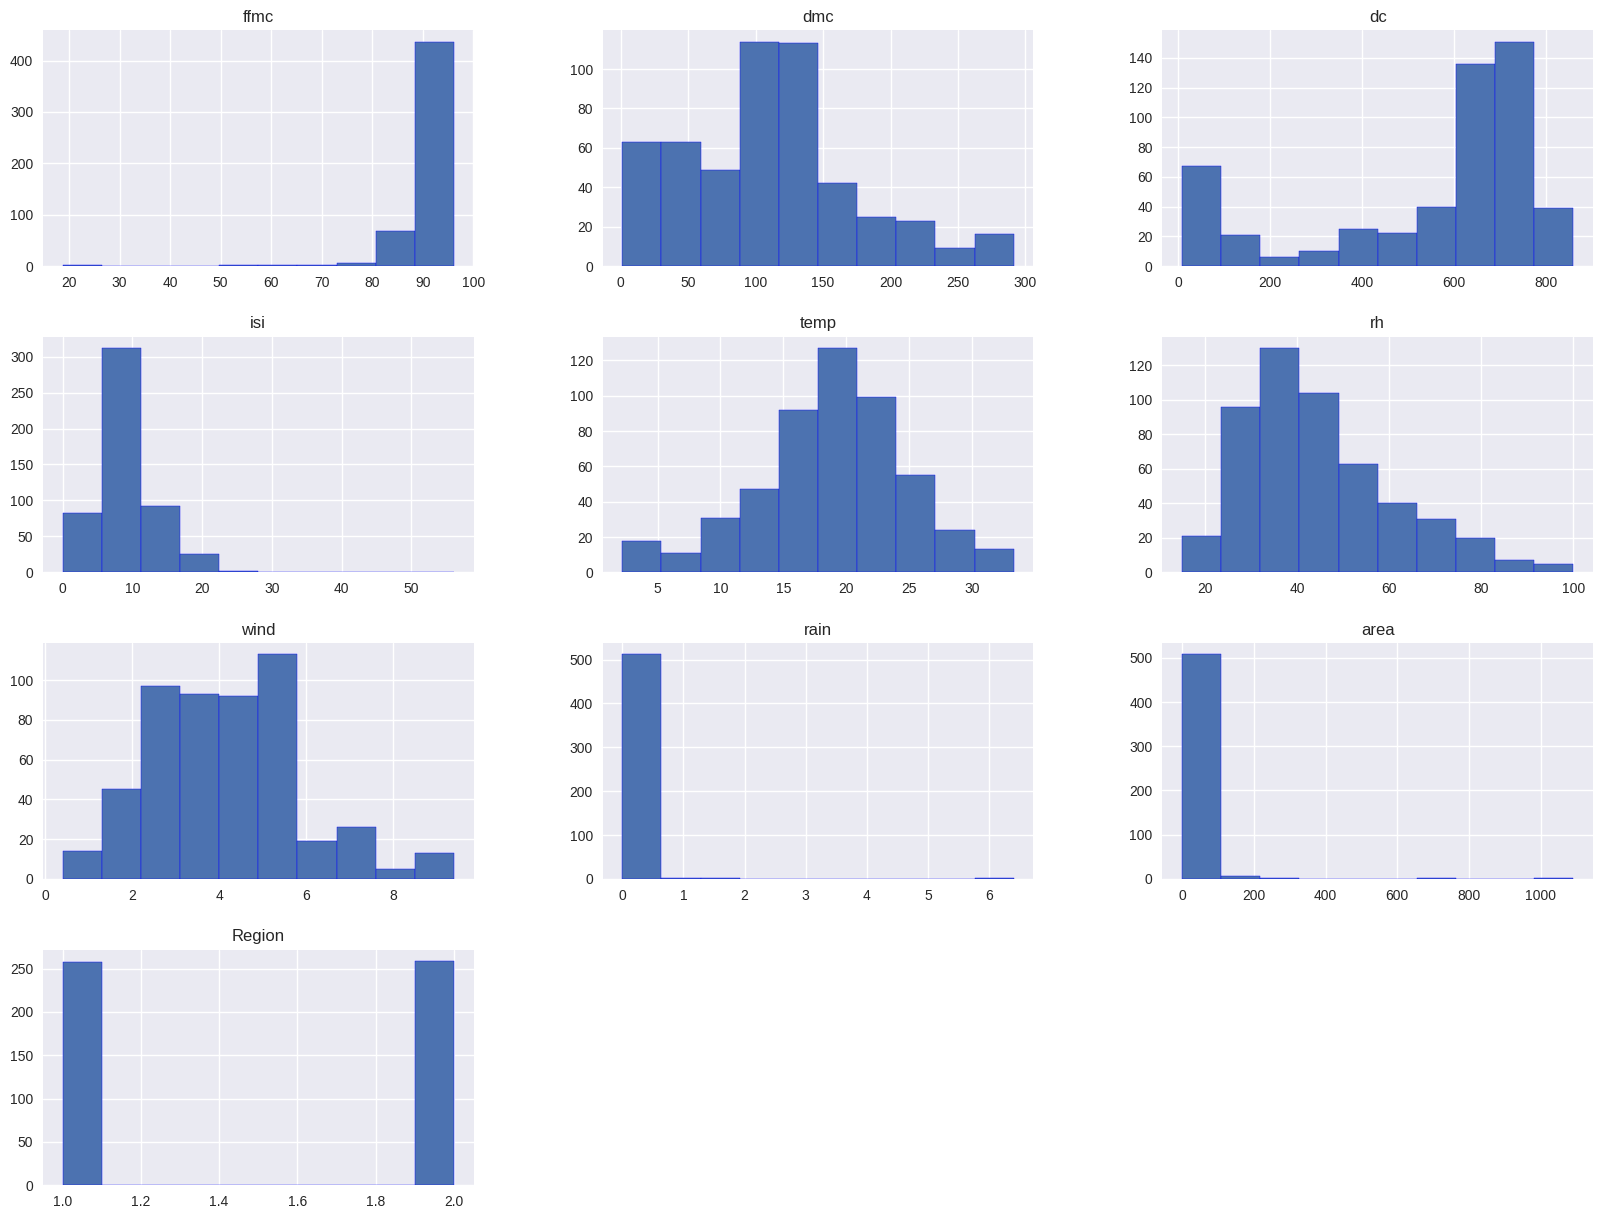

In [21]:
# utilizes the matplotlib library to create the histograms taking different factors 
plt.style.use('seaborn')
df1.hist( figsize=(20,15), ec = 'b')
plt.show()

In [22]:
#no. of records where area burnt is zero
list(df['area']).count(0)

247

In [23]:
#performs group by operation on months and give average of each group
df.groupby(by="month").mean()

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Region
month,,,,,,,,,,,,
apr,5.777778,4.222222,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111,1.333333
aug,4.483696,4.282609,92.336957,153.732609,641.077717,11.072283,21.631522,45.489130,4.086413,0.058696,12.489076,1.543478
dec,4.555556,5.000000,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000,13.330000,2.000000
feb,5.150000,4.400000,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000,1.600000
jan,3.000000,4.500000,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000,1.500000
jul,5.218750,4.593750,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687,1.781250
jun,6.294118,4.823529,89.429412,93.382353,297.705882,11.776471,20.494118,45.117647,4.135294,0.000000,5.841176,1.882353
mar,4.722222,4.481481,89.444444,34.542593,75.942593,7.107407,13.083333,40.000000,4.968519,0.003704,4.356667,1.148148
may,5.000000,4.000000,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000,2.000000


Text(0, 0.5, 'area')

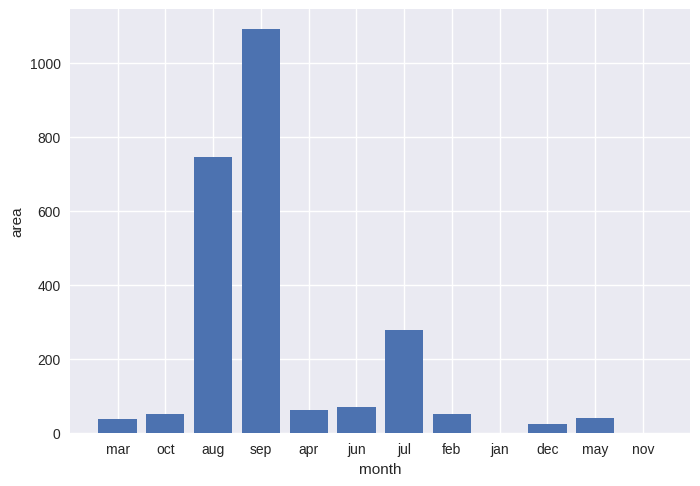

In [24]:
#uses matplotlib to create a bar plot using the values from the 'month' column as the x-axis and the values from the 'area' column as the y-axis
plt.bar(list(df['month']),list(df['area']))
plt.xlabel("month")
plt.ylabel("area")
#From the graph we can get to know in which month more area is burnt by forest fire. 
#This could further tell in which month there are maximum chances of forest fire so that the preacations could be taken beforehand.

Destruction by forest fire is maximum in the month of aug and september.

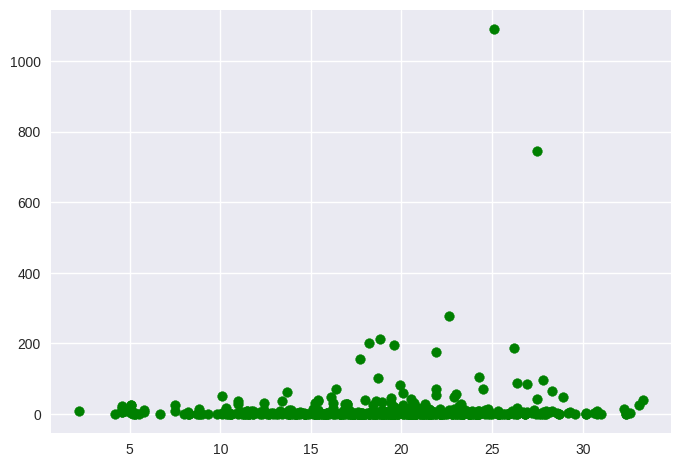

In [25]:
# creates a scatter plot using the values from the 'temp' column as the x-axis and the values from the 'area' column as the y-axis. 
plt.scatter(x=df['temp'],y=df['area'],color='green')

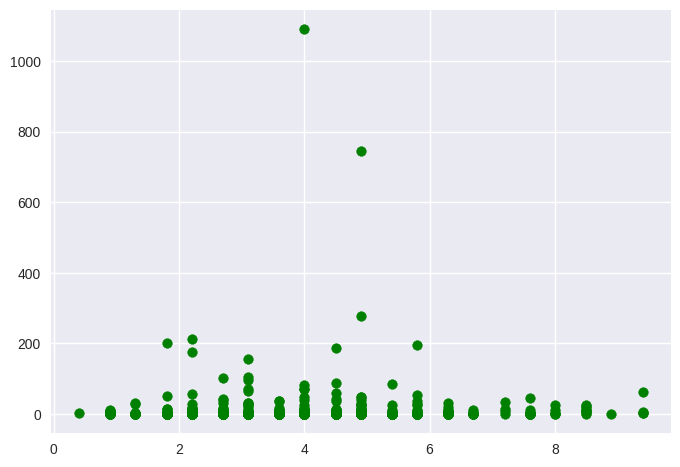

In [26]:
#creates a scatter plot using the values from the 'wind' column as the x-axis and the values from the 'area' column as the y-axis.
plt.scatter(x=df['wind'],y=df['area'],color='green')

wind is a potential attribute.

Temperature and wind are correlated for the given point.

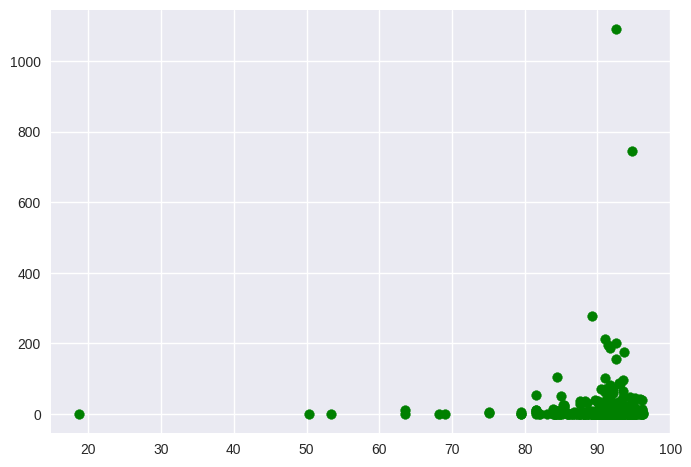

In [27]:
# creates a scatter plot using the values from the 'ffmc' column as the x-axis and the values from the 'area' column as the y-axis
plt.scatter(x=df['ffmc'],y=df['area'],color='green')

1/x type of graph between ffmc and area.
One of the potential attribute (point scattered at a point )

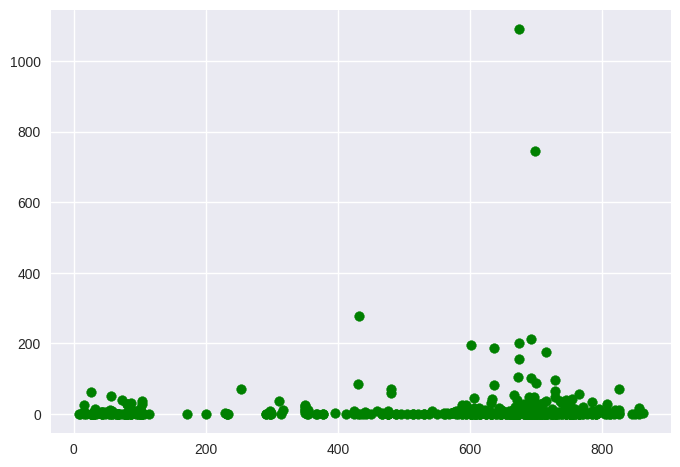

In [28]:
#creates a scatter plot using the values from the 'dc' column as the x-axis and the values from the 'area' column as the y-axis
plt.scatter(x=df['dc'],y=df['area'],color='green')

Dc vs area almost same like ffmc vs area scatter plot. 2 outliers present in dc vs area plot.
Ffmc and dc have some correlation,correlated attributes not taken into consideration.

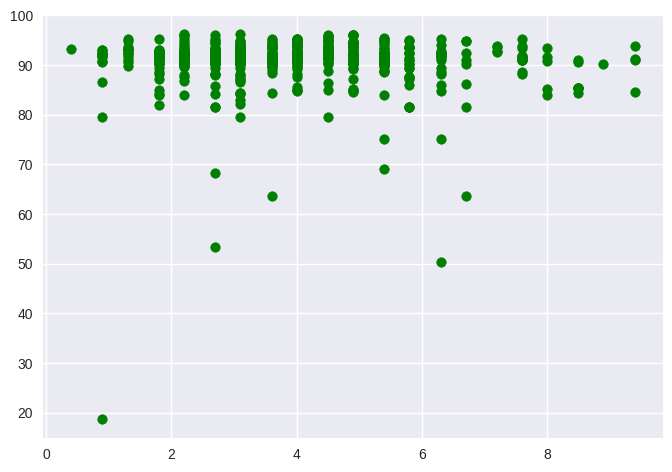

In [29]:
# creates a scatter plot using the values from the 'wind' column as the x-axis and the values from the 'ffmc' column as the y-axis
plt.scatter(x=df['wind'],y=df['ffmc'],color='green')

Checked for ffmc and wind relation. No finite relation between them, therefore both attributes are taken into consideration 

In [31]:
#normalizing the 'wind' and 'ffmc' columns
from sklearn.preprocessing import PolynomialFeatures
normalized_wind=df['wind']/df['wind'].max()
normalized_ffmc=df['ffmc']/df['ffmc'].max()
new_data =np.array(pd.concat([normalized_wind,normalized_ffmc],axis=1))
area=np.array(df['area']);
new_data*=10   #so the new data lies between the range of 0 to 10
new_data

array([[7.12765957, 8.96049896],
       [0.95744681, 9.41787942],
       [1.38297872, 9.41787942],
       ...,
       [7.12765957, 8.48232848],
       [4.25531915, 9.81288981],
       [4.78723404, 8.26403326]])

In [32]:
#split the data into training and testing sets.
from sklearn.model_selection import train_test_split
# 80% data taken for training ans 20% for testing.
x_train,x_test,y_train,y_test=train_test_split(new_data,area,train_size=0.8)

In [47]:
poly=PolynomialFeatures(degree=3)
polu_features=poly.fit_transform(new_data)
x_train,x_test,y_train,y_test=train_test_split(new_data,area,train_size=0.9)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#linear regression model is being created and fitted to the training data.
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=model.predict(x_test)
y_pred

array([16.46306127, 15.04667755, 11.43772295, 10.95823183, 15.20090468,
       12.91840604, 14.04925272, 13.15374226, 11.23811814, 14.17973503,
       14.04925272, 10.60945141, 13.44033528, 11.69868757, 13.09049888,
       13.19723637, 10.91285415, 12.80390586, 13.54624518, 12.2838602 ,
       11.47639392, 11.19568002, 14.69872472, 14.67603588, 13.19535279,
       12.83141783, 13.21992521, 12.76229533, 15.39651395, 13.41764644,
       12.28197662, 13.61513928, 14.04736915, 13.15374226, 13.82884265,
       10.54326847, 14.04925272, 14.07005799, 12.58831892,  8.54148373,
       13.52732348, 12.30466546, 10.43253544, 13.13105343, 13.69836034,
       15.50619099, 11.82434675, 14.15787379, 12.89277764, 12.3273543 ,
        2.06380188,  6.95971387])

In [58]:
from sklearn .metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

18.50351683820918

mean absolute error (MAE) between the predicted values (y_pred) and the actual target values (y_test) is approximately equal to 18. (wrt area)

In [46]:
import pickle
pickle.dump(model,open("model.sav",'wb'))

In [59]:
loaded=pickle.load(open("/kaggle/working/model.sav",'rb'))
load_pred=loaded.predict(x_test)
mean_absolute_error(y_test,load_pred)

18.93754751011324